In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import io
import boto3

In [ ]:
bucket_name = "lneg-loka"
file_name = "patient_data_raw.csv"
processed_file_name = "patient_data_processed.csv"
s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket_name, Key=processed_file_name)
csv_string = obj['Body'].read().decode('utf-8')
data = pd.read_csv(io.StringIO(csv_string))


In [ ]:
data

In [ ]:
data=data.drop('Unnamed: 0',axis=1)

In [ ]:
data

In [ ]:
target_name = 'chronic_obstructive_pulmonary_disease'
X = data.drop(target_name, axis=1)
y = data[target_name]

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [40]:
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [41]:
model.get_depth()

5

In [42]:
model.get_n_leaves()

23

In [43]:
y_pred = model.predict(X_test)

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred)) #informative since classes are balanced


Accuracy: 0.25


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           A       0.29      0.02      0.04       253
           B       0.28      0.05      0.08       258
           C       0.25      0.91      0.39       247
           D       0.37      0.03      0.05       242

    accuracy                           0.25      1000
   macro avg       0.29      0.25      0.14      1000
weighted avg       0.29      0.25      0.14      1000



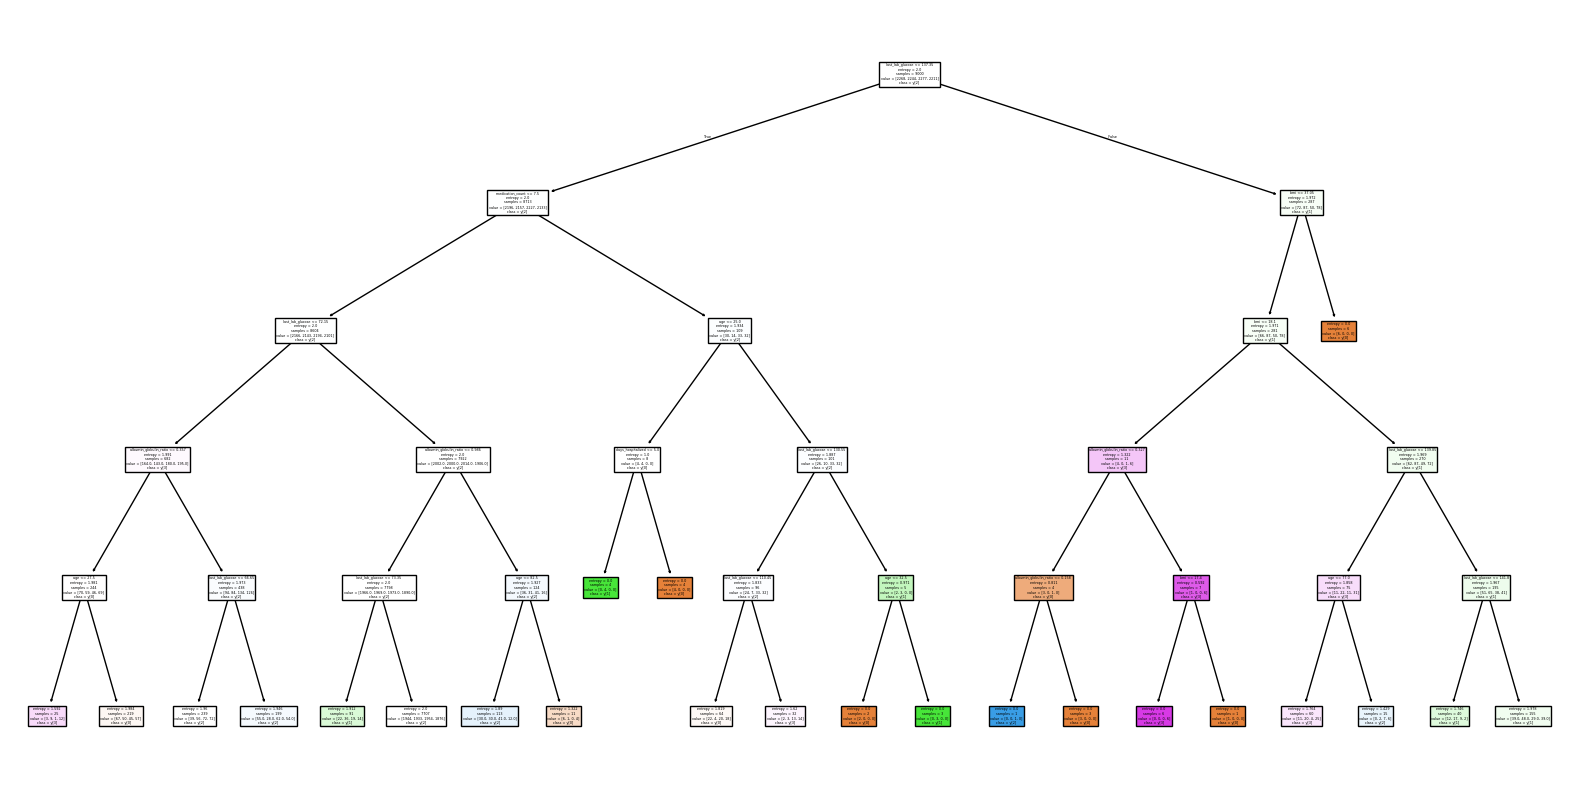

In [46]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
plt.show()

In [48]:
import joblib
import os

In [49]:
model_dir = '.\..\models'
model_name = 'decision_tree_classifier.joblib'
joblib.dump(model,os.path.join(model_dir,model_name))

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\negra\AppData\Local\Temp\ipykernel_2608\2380166296.py:1: SyntaxWarning: invalid escape sequence '\.'
  model_dir = '.\..\models'


['.\\..\\models\\decision_tree_classifier.joblib']